In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import tensorflow as tf
from PIL import Image

import helper_functions_martin as hf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [4]:
training_dir = "data/training/"
image_dir = training_dir + "images/"
gt_dir = training_dir + "groundtruth/"
aug_image_dir = training_dir + "aug_images/"
aug_gt_dir = training_dir + "aug_groundtruth/"

files = os.listdir(image_dir)
# Load all images and groundtruths
n = len(files)
imgs = [hf.load_image(image_dir + files[i]) for i in range(n)]
gt_imgs = [hf.load_image(gt_dir + files[i]) for i in range(n)]

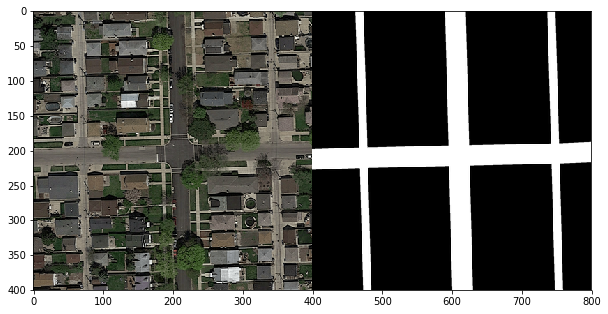

In [5]:
cimg = hf.concatenate_images(imgs[0], gt_imgs[0])
fig1 = plt.figure(figsize=(10, 10))
plt.imshow(cimg, cmap='Greys_r')

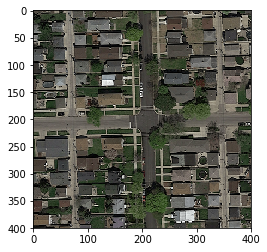

In [6]:
plt.imshow(imgs[0])

In [21]:
def augment_image(image, image_dir, gt, groundtruth_path, augment_num, image_gen, gt_gen):
    """
    Creates augmented pictures for given picture and groundtruth and saves it to a directory
    """
    
    image_expanded = np.expand_dims(image, 0)
    gt_expanded = np.expand_dims(gt, len(gt.shape))  # 1 i siste dimensjon gir gray scale???
    gt_expanded = np.expand_dims(gt_expanded, 0)
    
    seed = 12345
    
    aug_iter = image_gen.flow(image_expanded, seed=seed, save_to_dir=image_dir)
    gt_iter = gt_gen.flow(gt_expanded, seed=seed, save_to_dir=groundtruth_path)
    
    for i in range(augment_num):
        next(aug_iter)
        next(gt_iter)
    

def augment_images(images, images_path, gts, gts_path, augment_num):
    data_gen_args  = dict(horizontal_flip=True, 
                          vertical_flip=True, 
                          height_shift_range=0.2, 
                          width_shift_range=0.2, 
                          rotation_range=20, 
                          zoom_range=[0.9, 1.25], 
                          # share_range = 0.15,
                          fill_mode="reflect"  # Because ......
                         )
    
    image_gen = ImageDataGenerator(**data_gen_args)
    gt_gen = ImageDataGenerator(**data_gen_args)
    
    for i in range(len(images)):
        augment_image(images[i], images_path, gts[i], gts_path, augment_num, image_gen, gt_gen)
        
        
augment_num = 10

if not os.listdir(aug_image_dir):
    print("Created augemented pictures")
    augment_images(imgs, aug_image_dir, gt_imgs, aug_gt_dir, augment_num)
else:
    print("Augmented pictures exists")

Created augemented pictures
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


The question is if we should create salt and pepper and gaussian noice on the pictures we have or do it on duplicates effectivly doubleing the size of our dataset.

In [25]:
files = os.listdir(aug_image_dir)
# Load all images and groundtruths
n = len(files)
aug_imgs = [hf.load_image(aug_image_dir + files[i]) for i in range(n)]
aug_gt_imgs = [hf.load_image(aug_gt_dir + files[i]) for i in range(n)]

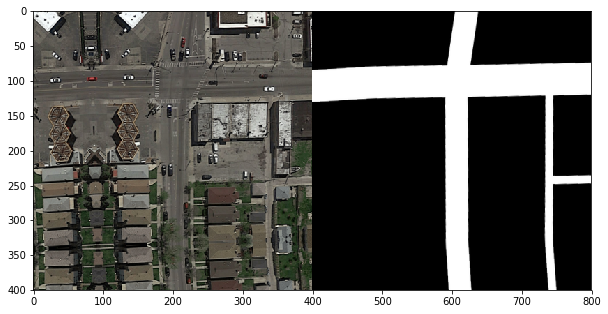

In [26]:
cimg = hf.concatenate_images(imgs[0], gt_imgs[0])
fig1 = plt.figure(figsize=(10, 10))
plt.imshow(cimg, cmap='Greys_r')